In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk import sent_tokenize
from prepare import prepare

In [2]:
with open('data.json') as json_file:
    data = json.load(json_file)

In [3]:
df = pd.DataFrame(data)

# Check out prepare for prepare details

In [4]:
train, validate, test = prepare(df)

In [5]:
train.size, validate.size, test.size

(348, 150, 126)

In [6]:
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
74,Ryujinx/Ryujinx,C#,"\n<h1>\n <img src=""https://i.imgur.com/G6Ml...",h1 img srchttpsiimgurcomg6mlecopng ryujinx hre...,h1 img srchttpsiimgurcomg6mlecopng ryujinx hre...,h1 img srchttpsiimgurcomg6mlecopng ryujinx hre...
71,egametang/ET,C#,# [中文](https://github.com/egametang/Egametang/...,httpsgithubcomegametangegametangblobmasterread...,httpsgithubcomegametangegametangblobmasterread...,httpsgithubcomegametangegametangblobmasterread...
89,bombomby/optick,C#,# [Optick: C++ Profiler For Games](https://opt...,optick c profiler gameshttpsoptickdev githubht...,optick c profil gameshttpsoptickdev githubhttp...,optick c profiler gameshttpsoptickdev githubht...
1,cl2333/Grokking-the-Coding-Interview-Patterns-...,Python,# [Grokking-the-Coding-Interview-Patterns-for-...,grokkingthecodinginterviewpatternsforcodingque...,grokkingthecodinginterviewpatternsforcodingque...,grokkingthecodinginterviewpatternsforcodingque...
100,gustavoguanabara/html-css,HTML,"<img src=""imagens/mascote.png"" align=""right"" w...",img srcimagensmascotepng alignright width300 c...,img srcimagensmascotepng alignright width300 c...,img srcimagensmascotepng alignright width300 c...


# No duplicates

In [7]:
df[df.duplicated()]

,repo,language,readme_contents


# Exploration

In [8]:
def clean(text):
    'A simple function to cleanup text data'
    
    ADDITIONAL_STOPWORDS = []
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [9]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(df, "language")

,n,percent
HTML,29,0.243697
C#,27,0.226891
Python,25,0.210084
JavaScript,23,0.193277
Java,15,0.126050


In [10]:
python_words = clean(' '.join(df[df.language == 'Python'].readme_contents))

In [11]:
c_sharp_words = clean(' '.join(df[df.language == 'C#'].readme_contents))

In [12]:
html_words = clean(' '.join(df[df.language == 'HTML'].readme_contents))

In [13]:
javascript_words = clean(' '.join(df[df.language == 'JavaScript'].readme_contents))

In [14]:
java_words = clean(' '.join(df[df.language == 'Java'].readme_contents))

In [15]:
ruby_words = clean(' '.join(df[df.language == 'Ruby'].readme_contents))

In [16]:
shell_words = clean(' '.join(df[df.language == 'Shell'].readme_contents))

### Freq

In [17]:
python_freq = pd.Series(python_words).value_counts()

In [18]:
c_sharp_freq = pd.Series(c_sharp_words).value_counts()

In [19]:
html_freq = pd.Series(html_words).value_counts()

In [20]:
javascript_freq = pd.Series(javascript_words).value_counts()

In [21]:
java_freq = pd.Series(java_words).value_counts()

In [22]:
ruby_freq = pd.Series(ruby_words).value_counts()

<ipython-input-22-3c920b4893cb>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ruby_freq = pd.Series(ruby_words).value_counts()


In [23]:
shell_freq = pd.Series(shell_words).value_counts()

<ipython-input-23-84670517d0d1>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  shell_freq = pd.Series(shell_words).value_counts()


In [24]:
python_freq.head()

yes        1639
unknown     926
apikey      573
video       489
python      447
dtype: int64

In [25]:
c_sharp_freq.head()

new       192
c         188
use       186
var       185
csharp    156
dtype: int64

In [26]:
html_freq.head()

html        97
file        76
use         76
15001700    62
dom         51
dtype: int64

In [27]:
javascript_freq.head()

javascript    309
function      276
const         261
1             240
bad           205
dtype: int64

In [28]:
java_freq.head()

altbr           189
aligncentera    189
width100px      189
td              189
java            177
dtype: int64

### Ruby and Shell only have one observation so we can either drop or go find more

In [29]:
ruby_freq.head()

Series([], dtype: int64)

In [30]:
shell_freq.head()

Series([], dtype: int64)

# Explore on Train 

In [31]:
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
74,Ryujinx/Ryujinx,C#,"\n<h1>\n <img src=""https://i.imgur.com/G6Ml...",h1 img srchttpsiimgurcomg6mlecopng ryujinx hre...,h1 img srchttpsiimgurcomg6mlecopng ryujinx hre...,h1 img srchttpsiimgurcomg6mlecopng ryujinx hre...
71,egametang/ET,C#,# [中文](https://github.com/egametang/Egametang/...,httpsgithubcomegametangegametangblobmasterread...,httpsgithubcomegametangegametangblobmasterread...,httpsgithubcomegametangegametangblobmasterread...
89,bombomby/optick,C#,# [Optick: C++ Profiler For Games](https://opt...,optick c profiler gameshttpsoptickdev githubht...,optick c profil gameshttpsoptickdev githubhttp...,optick c profiler gameshttpsoptickdev githubht...
1,cl2333/Grokking-the-Coding-Interview-Patterns-...,Python,# [Grokking-the-Coding-Interview-Patterns-for-...,grokkingthecodinginterviewpatternsforcodingque...,grokkingthecodinginterviewpatternsforcodingque...,grokkingthecodinginterviewpatternsforcodingque...
100,gustavoguanabara/html-css,HTML,"<img src=""imagens/mascote.png"" align=""right"" w...",img srcimagensmascotepng alignright width300 c...,img srcimagensmascotepng alignright width300 c...,img srcimagensmascotepng alignright width300 c...


In [32]:
train.stemmed[0]

"nostalgiaforinfin trade strategi freqtradehttpswwwfreqtradeio crypto bot clone repositori plan clone repositori use strategi regular git clone howev plan run addit strategi run test suit need clone repositori ' submodul newer version git bash git clone recursesubmodul httpsgithubcomiterativvnostalgiaforinfinitygit checkoutpath older version git bash git clone recurs httpsgithubcomiterativvnostalgiaforinfinitygit checkoutpath exist checkout git submodul updat remot checkout chang strategi add strategi userdatastrategiesuserdatastrategi folder also dockercomposeymldockercomposeyml file strategylist add strategi list gener recommend optim perform suggest use 4 6 open trade unlimit stake pairlist 40 80 pair volum pairlist work well prefer stabl coin usdt busd etc pair instead btc eth pair highli recommend blacklist leverag token bull bear etc ensur ' overrid variabl configjson especi timefram must 5m usesellsign must set true set sellprofitonli must set fals set ignoreroiifbuysign must se

In [33]:
train.clean[0]

"nostalgiaforinfinity trading strategy freqtradehttpswwwfreqtradeio crypto bot clone repository plan clone repository use strategy regular git clone however plan running additional strategies run test suite need clone repository ' submodules newer versions git bash git clone recursesubmodules httpsgithubcomiterativvnostalgiaforinfinitygit checkoutpath older versions git bash git clone recursive httpsgithubcomiterativvnostalgiaforinfinitygit checkoutpath existing checkouts git submodule update remote checkout change strategy add strategies userdatastrategiesuserdatastrategies folder also dockercomposeymldockercomposeyml file strategylist add strategy list general recommendations optimal performance suggested use 4 6 open trades unlimited stake pairlist 40 80 pairs volume pairlist works well prefer stable coin usdt busd etc pairs instead btc eth pairs highly recommended blacklist leveraged tokens bull bear etc ensure ' override variables configjson especially timeframe must 5m usesellsig

In [34]:
train.lemmatized[0]

"nostalgiaforinfinity trading strategy freqtradehttpswwwfreqtradeio crypto bot clone repository plan clone repository use strategy regular git clone however plan running additional strategy run test suite need clone repository ' submodules newer version git bash git clone recursesubmodules httpsgithubcomiterativvnostalgiaforinfinitygit checkoutpath older version git bash git clone recursive httpsgithubcomiterativvnostalgiaforinfinitygit checkoutpath existing checkout git submodule update remote checkout change strategy add strategy userdatastrategiesuserdatastrategies folder also dockercomposeymldockercomposeyml file strategylist add strategy list general recommendation optimal performance suggested use 4 6 open trade unlimited stake pairlist 40 80 pair volume pairlist work well prefer stable coin usdt busd etc pair instead btc eth pair highly recommended blacklist leveraged token bull bear etc ensure ' override variable configjson especially timeframe must 5m usesellsignal must set tr

In [35]:
labels = pd.concat([train.language.value_counts(),
                    train.language.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
HTML,16,0.275862
C#,15,0.258621
Python,14,0.241379
JavaScript,13,0.224138


In [37]:
train.columns

Index(['repo', 'language', 'readme_contents', 'clean', 'stemmed',
       'lemmatized'],
      dtype='object')

In [62]:
ADDITIONAL_STOPWORDS = ['9']

def clean_up(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [63]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([train[column].value_counts(),
                    train[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(df, "language")

,n,percent
HTML,16,0.275862
C#,15,0.258621
Python,14,0.241379
JavaScript,13,0.224138


In [105]:
html_words = clean_up(' '.join(train[train.language == 'HTML'].readme_contents))

In [106]:
html_freq = pd.DataFrame(html_words)

In [107]:
html_freq.value_counts()

15001700                    62
html                        60
email                       44
use                         39
20002200                    38
                            ..
gitter                       1
githubs                      1
githttpgitscmcom             1
gitgithubcommrmrshtmlgit     1
instituicoes                 1
Length: 1644, dtype: int64

In [74]:
python_words = clean_up(' '.join(train[train.language == 'Python'].stemmed))

In [75]:
p_words = pd.DataFrame(python_words)

In [76]:
p_words.value_counts()

use                                                                                                     209
video                                                                                                   202
youtubedl                                                                                               154
download                                                                                                154
file                                                                                                    139
                                                                                                       ... 
filterclass                                                                                               1
nearli                                                                                                    1
near                                                                                                      1
ncfoxnts3dhmrg2fupnr9mpv45nl

In [89]:
html_words = clean_up(' '.join(train[train.language == 'HTML'].clean))
python_words = clean_up(' '.join(train[train.language == 'Python'].clean))
C_sharp_words = clean_up(' '.join(train[train.language == 'C#'].clean))
JavaScript_words = clean_up(' '.join(train[train.language == 'JavaScript'].clean))

all_words = clean_up(' '.join(train.clean))

In [94]:
html_freq = pd.Series(html_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
C_sharp_freq = pd.Series(C_sharp_words).value_counts()
JavaScript_freq = pd.Series(JavaScript_words).value_counts()
all_freq = pd.Series(all_words).value_counts()



print('Top Ten Words for HMTL ReadMEs')
print(html_freq.head(10))
print ("--------------")
print('Top Ten Words for Python ReadMEs')
print(python_freq.head(10))
print ("--------------")
print('Top Ten Words for C# ReadMEs')
print(C_sharp_freq.head(10))
print ("--------------")
print('Top Ten Words for JavaScript ReadMEs')
print(JavaScript_freq.head(10))
print ("--------------")
print('Top Ten Words for ALL ReadMEs')
print(all_freq.head(10))

Top Ten Words for HMTL ReadMEs
9           228
15001700     62
html         60
email        44
use          39
20002200     38
html5        31
template     26
file         26
cs           20
dtype: int64
--------------
Top Ten Words for Python ReadMEs
video        202
youtubedl    154
file         135
use          117
format       102
bot          101
download      97
python        96
example       81
message       78
dtype: int64
--------------
Top Ten Words for C# ReadMEs
9              262
use            130
c              128
new            124
type           113
var            110
public         103
messagepack    103
support         89
using           88
dtype: int64
--------------
Top Ten Words for JavaScript ReadMEs
javascript    264
const         263
function      226
bad           203
1             191
good          184
return        126
use           124
foo           116
x             110
dtype: int64
--------------
Top Ten Words for ALL ReadMEs
9             609
use       

In [92]:
#Josh's code
#words = []
#for word in list(train[train.language == 'Python'].lemmatized):
#    words.extend(word.split())

In [ ]:
#python_words = pd.DataFrame(words)

In [93]:
#python_words.value_counts()

#  Hypotheses
 
 - does the average length of each readme vary between the different languages?
 - do the number of times readmes refer to the language/average number each readme refers to itself vary between languages?
 - does one language have more numbers than letters?



In [95]:
html_words_stemmed = clean_up(' '.join(train[train.language == 'HTML'].stemmed))
python_words_stemmed = clean_up(' '.join(train[train.language == 'Python'].stemmed))
C_sharp_words_stemmed = clean_up(' '.join(train[train.language == 'C#'].stemmed))
JavaScript_words_stemmed = clean_up(' '.join(train[train.language == 'JavaScript'].stemmed))

all_words_stemmed = clean_up(' '.join(train.stemmed))

In [104]:
html_stemmed_freq = pd.Series(html_words_stemmed).value_counts()
python_stemmed_freq = pd.Series(python_words_stemmed).value_counts()
C_sharp_stemmed_freq = pd.Series(C_sharp_words_stemmed).value_counts()
JavaScript_stemmed_freq = pd.Series(JavaScript_words_stemmed).value_counts()
all_stemmed_freq = pd.Series(all_words_stemmed).value_counts()



print('Top Ten Words for HMTL ReadMEs (stemmed)')
print(html_stemmed_freq.head(10))
print ("--------------")
print('Top Ten Words for Python ReadMEs (stemmed)')
print(python_stemmed_freq.head(10))
print ("--------------")
print('Top Ten Words for C# ReadMEs (stemmed)')
print(C_sharp_stemmed_freq.head(10))
print ("--------------")
print('Top Ten Words for JavaScript ReadMEs (stemmed)')
print(JavaScript_stemmed_freq.head(10))
print ("--------------")
print('Top Ten Words for ALL ReadMEs (stemmed)')
print(all_stemmed_freq.head(10))


Top Ten Words for HMTL ReadMEs (stemmed)
9           228
use          62
15001700     62
html         60
email        44
20002200     38
html5        31
test         27
templat      26
file         26
dtype: int64
--------------
Top Ten Words for Python ReadMEs (stemmed)
use          209
video        202
download     154
youtubedl    154
file         139
format       108
bot          101
python        96
exampl        81
messag        78
dtype: int64
--------------
Top Ten Words for C# ReadMEs (stemmed)
use            303
9              262
c              128
new            124
type           117
support        113
var            110
messagepack    103
public         103
serial         100
dtype: int64
--------------
Top Ten Words for JavaScript ReadMEs (stemmed)
javascript    265
const         264
function      233
bad           203
use           200
1             191
good          184
return        132
foo           116
x             110
dtype: int64
--------------
Top Ten Words for 

In [98]:
train.columns

Index(['repo', 'language', 'readme_contents', 'clean', 'stemmed',
       'lemmatized'],
      dtype='object')

In [99]:
html_words_lemmatized = clean_up(' '.join(train[train.language == 'HTML'].lemmatized))
python_words_lemmatized = clean_up(' '.join(train[train.language == 'Python'].lemmatized))
C_sharp_words_lemmatized = clean_up(' '.join(train[train.language == 'C#'].lemmatized))
JavaScript_words_lemmatized = clean_up(' '.join(train[train.language == 'JavaScript'].lemmatized))

all_words_lemmatized = clean_up(' '.join(train.lemmatized))

In [103]:
html_lemmatized_freq = pd.Series(html_words_lemmatized).value_counts()
python_lemmatized_freq = pd.Series(python_words_lemmatized).value_counts()
C_sharp_lemmatized_freq = pd.Series(C_sharp_words_lemmatized).value_counts()
JavaScript_lemmatized_freq = pd.Series(JavaScript_words_lemmatized).value_counts()
all_lemmatized_freq = pd.Series(all_words_lemmatized).value_counts()



print('Top Ten Words for HMTL ReadMEs (lemmatized)')
print(html_lemmatized_freq.head(10))
print ("--------------")
print('Top Ten Words for Python ReadMEs (lemmatized)')
print(python_lemmatized_freq.head(10))
print ("--------------")
print('Top Ten Words for C# ReadMEs (lemmatized)')
print(C_sharp_lemmatized_freq.head(10))
print ("--------------")
print('Top Ten Words for JavaScript ReadMEs (lemmatized)')
print(JavaScript_lemmatized_freq.head(10))
print ("--------------")
print('Top Ten Words for ALL ReadMEs (lemmatized)')
print(all_lemmatized_freq.head(10))


Top Ten Words for HMTL ReadMEs (lemmatized)
9           228
15001700     62
html         60
email        44
use          39
20002200     38
html5        31
template     26
file         26
c            21
dtype: int64
--------------
Top Ten Words for Python ReadMEs (lemmatized)
video        202
youtubedl    154
file         135
use          117
format       102
bot          101
download      97
python        96
example       81
message       78
dtype: int64
--------------
Top Ten Words for C# ReadMEs (lemmatized)
9              262
use            130
c              128
new            124
type           113
var            110
public         103
messagepack    103
support         89
using           88
dtype: int64
--------------
Top Ten Words for JavaScript ReadMEs (lemmatized)
javascript    264
const         263
function      226
bad           203
1             191
good          184
return        126
use           124
foo           116
x             110
dtype: int64
--------------
Top Te

## Takeaways from looking at top ten words:  
 - There is some crossover for top ten words across the various text (ie: clean, stemmed, lemmatized)
 - The top ten words are mostly domain specific for each language with a few exceptions
 - Sometimes there are numeric codes, but they make sense for each language

****
## Moving forward, I want to look at the average length of repos for each language.

In [108]:
train['length'] = [len(i) for i in train.clean]

In [110]:
print('The mean character length for HTML ReadME')
print(train[train.language == 'HTML'].mean())
print('----------------------------')
print('The mean character length for Python ReadME')
print(train[train.language == 'Python'].mean())
print('----------------------------')
print('The mean character length for C# ReadME')
print(train[train.language == 'C#'].mean())
print('----------------------------')
print('The mean character length for JavaScript ReadME')
print(train[train.language == 'JavaScript'].mean())
print('----------------------------')

The mean character length for HTML ReadME
length    2113.25
dtype: float64
----------------------------
The mean character length for Python ReadME
length    9971.714286
dtype: float64
----------------------------
The mean character length for C# ReadME
length    8590.4
dtype: float64
----------------------------
The mean character length for JavaScript ReadME
length    11099.0
dtype: float64
----------------------------


In [111]:
train.groupby(by = 'language').mean()

,length
language,
C#,8590.400000
HTML,2113.250000
JavaScript,11099.000000
Python,9971.714286


## Takeaway looking at character length of ReadMEs:
 - JavaScript ReadMEs appear to be the longest
 - Python and C# are fairly similar in length
 - HTML ReadMEs appear to be the shortest

In [112]:
train.groupby(by = 'language').nunique()

,repo,readme_contents,clean,stemmed,lemmatized,length
language,,,,,,
C#,15,15,15,15,15,15
HTML,16,16,16,16,16,16
JavaScript,13,13,13,13,13,13
Python,14,14,14,14,14,14


## Let's take a look at Unique words for each language

In [122]:
html_words
#python_unique = train.python_words.nunique())
#c_sharp_unique = pd.Series(data = c_sharp_words.nunique())
#JavaScript_unique = pd.Series(data = JavaScript_words.nunique())

['img',
 'srcimagensmascotepng',
 'alignright',
 'width300',
 'curso',
 'de',
 'html5',
 'e',
 'css3',
 'material',
 'publico',
 'para',
 'ensino',
 'basico',
 'de',
 'html5',
 'e',
 'css3',
 'para',
 'alunos',
 'iniciantes',
 'acesse',
 'material',
 'em',
 'pdf',
 'analise',
 'codigo',
 'disponibilizado',
 'para',
 'cada',
 'exercicio',
 'e',
 'vejaos',
 'funcionando',
 'em',
 'execucao',
 'direta',
 'via',
 'repositorio',
 'github',
 'acesse',
 'o',
 'pdfs',
 'da',
 'aulas',
 'clicando',
 'aquihttpsgithubcomgustavoguanabarahtmlcsstreemasteraulaspdf',
 'codigo',
 'disponivel',
 'para',
 'o',
 'exercicioshttpsgithubcomgustavoguanabarahtmlcsstreemasterexercicios',
 'execute',
 'o',
 'exercicios',
 'aquihttpsgustavoguanabaragithubiohtmlcssexercicios',
 'resolva',
 'o',
 'desafios',
 'de',
 'html',
 'aquihttpsgithubcomgustavoguanabarahtmlcsstreemasterdesafios',
 'direitos',
 'de',
 'uso',
 'voce',
 'tem',
 'todo',
 'direito',
 'de',
 'usar',
 'esse',
 'material',
 'para',
 'seu',
 'propri

## Let's look at top Bigrams in each language

In [135]:
python_top_words = ' '.join(train[train['language'] == 'Python'].clean)

<AxesSubplot:>

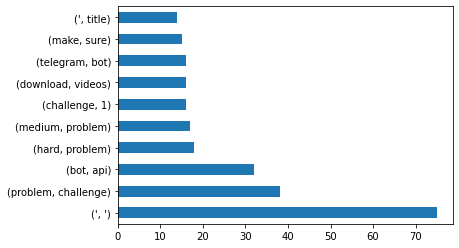

In [136]:
pd.Series(nltk.bigrams(python_top_words.split())).value_counts().head(10).plot.barh()

In [137]:
pd.Series(nltk.bigrams(python_top_words.split())).value_counts().head(10)

(', ')                  75
(problem, challenge)    38
(bot, api)              32
(hard, problem)         18
(medium, problem)       17
(challenge, 1)          16
(download, videos)      16
(telegram, bot)         16
(make, sure)            15
(', title)              14
dtype: int64

## I notice that "problem" and "challenge" are recurring words within more than one top bigram
## I also notice that "download videos" is top bigram with coincides with the single top word of "youtube".

In [138]:
html_top_words = ' '.join(train[train['language'] == 'HTML'].clean)

<AxesSubplot:>

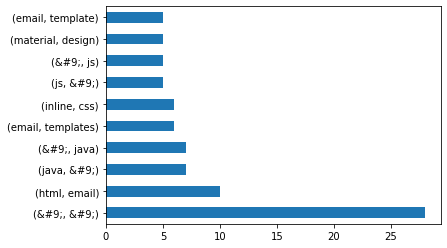

In [139]:
pd.Series(nltk.bigrams(html_top_words.split())).value_counts().head(10).plot.barh()

In [140]:
pd.Series(nltk.bigrams(html_top_words.split())).value_counts().head(10)

(&#9;, &#9;)          28
(html, email)         10
(java, &#9;)           7
(&#9;, java)           7
(email, templates)     6
(inline, css)          6
(js, &#9;)             5
(&#9;, js)             5
(material, design)     5
(email, template)      5
dtype: int64

## Takeaway here is that HTML references other languages within these top bigrams (ie: java, css) as well as email, template and design.

In [141]:
c_sharp_top_words = ' '.join(train[train['language'] == 'C#'].clean)

<AxesSubplot:>

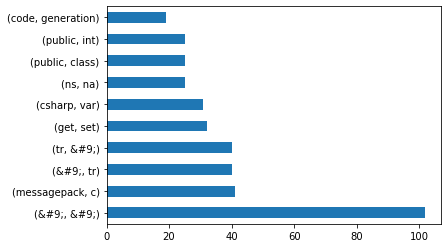

In [142]:
pd.Series(nltk.bigrams(c_sharp_top_words.split())).value_counts().head(10).plot.barh()

In [143]:
pd.Series(nltk.bigrams(c_sharp_top_words.split())).value_counts().head(10)

(&#9;, &#9;)          102
(messagepack, c)       41
(&#9;, tr)             40
(tr, &#9;)             40
(get, set)             32
(csharp, var)          31
(ns, na)               25
(public, class)        25
(public, int)          25
(code, generation)     19
dtype: int64

## I notice that messagepack and c is a top bigram, as well as get set; public, class, int.  
## Another thing I notice for C# is the high usage of coding language within the ReadME. &#9 is a top occuring 'word' for all languages EXCEPT Javascript. 
## That alone could be very useful.

In [144]:
JavaScript_top_words = ' '.join(train[train['language'] == 'JavaScript'].clean)

<AxesSubplot:>

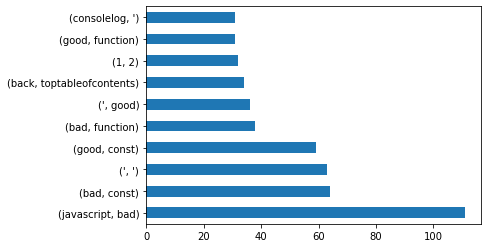

In [145]:
pd.Series(nltk.bigrams(JavaScript_top_words.split())).value_counts().head(10).plot.barh()

In [146]:
pd.Series(nltk.bigrams(JavaScript_top_words.split())).value_counts().head(10)

(javascript, bad)             111
(bad, const)                   64
(', ')                         63
(good, const)                  59
(bad, function)                38
(', good)                      36
(back, toptableofcontents)     34
(1, 2)                         32
(good, function)               31
(consolelog, ')                31
dtype: int64

## Takeaway for JavaScript is the high usage of bad, good, const, and function.  
***
## Overall I think this insight from bigrams could be the MOST identifiable feature for languages.

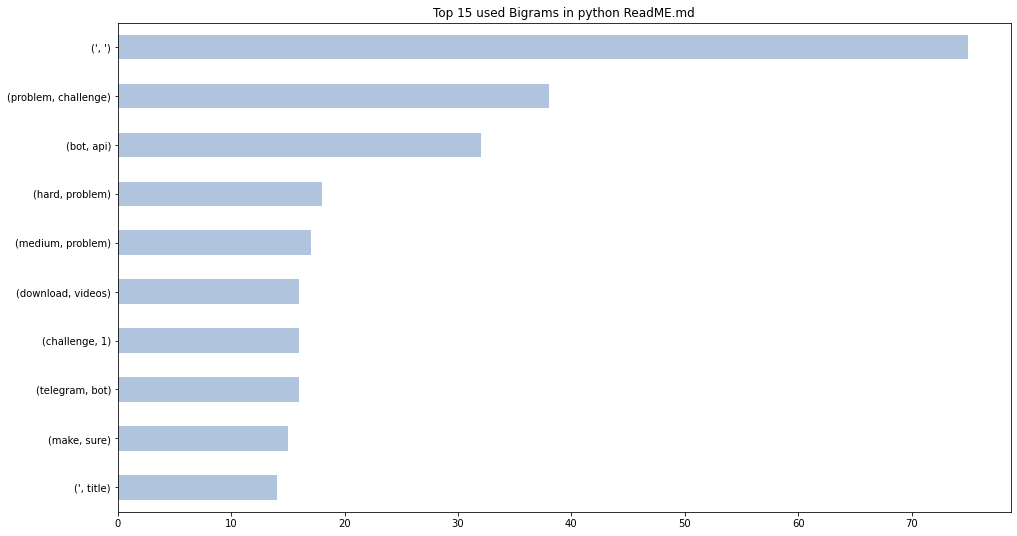

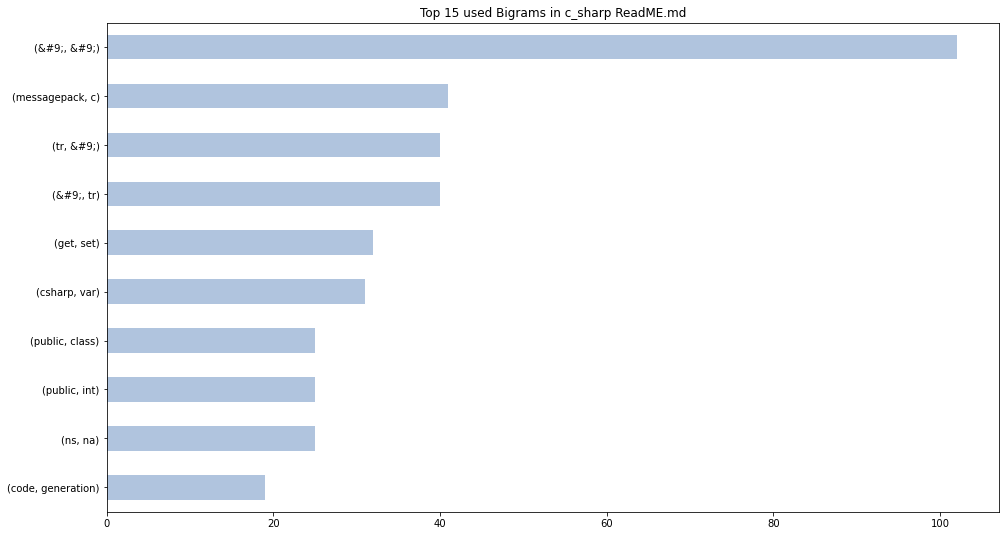

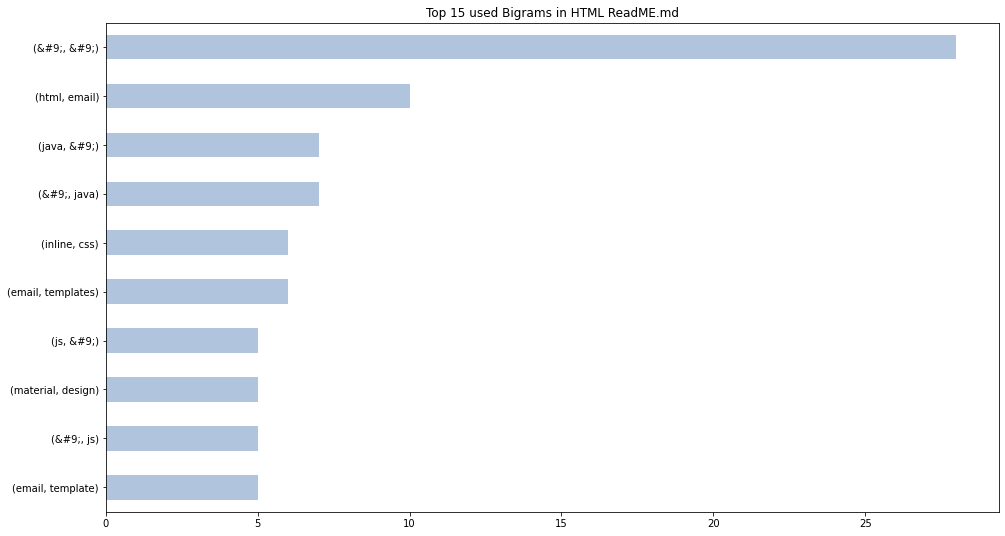

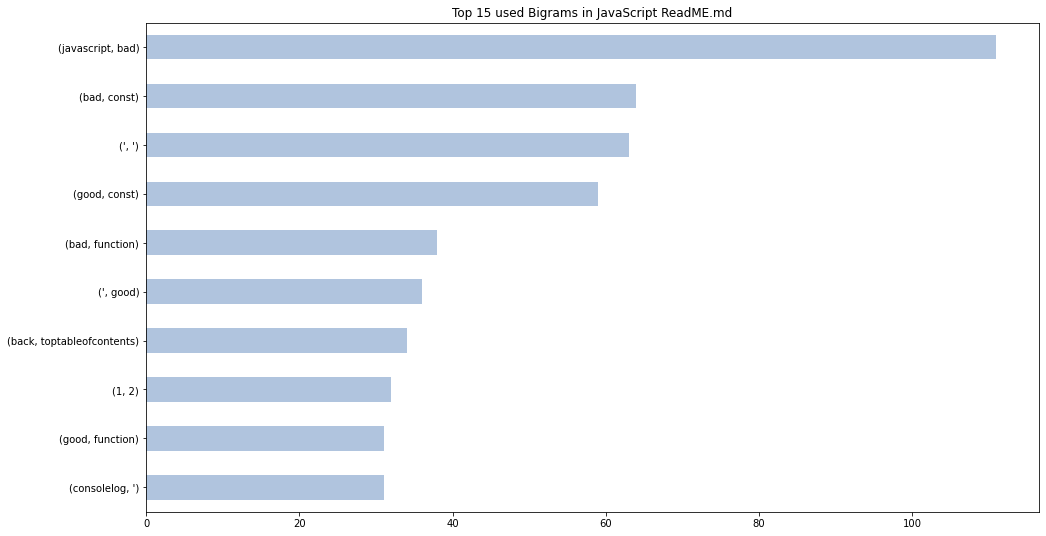

In [165]:
lang_clean_words = {'python':python_top_words,
              'c_sharp':c_sharp_top_words,
              'HTML':html_top_words,
              'JavaScript':JavaScript_top_words}
for key, value in lang_clean_words.items():
    plt.figure(figsize=(16, 9))
    pd.Series(nltk.bigrams(value.split())).value_counts(ascending = True).tail(10).plot.barh(color = 'lightsteelblue')
    plt.title(f'Top 15 used Bigrams in {key} ReadME.md')
    plt.show()

<AxesSubplot:>

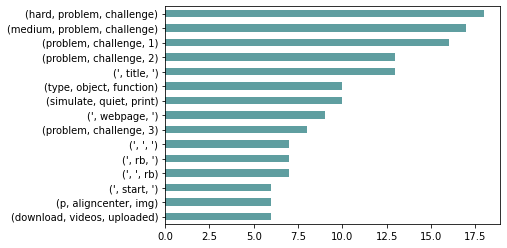

In [164]:
pd.Series(nltk.trigrams(python_top_words.split())).value_counts(ascending = True).tail(15).plot.barh(color = 'cadetblue')

## Takeaway for Python trigrams:
 - 'Hard, problem, challenge', 'Medium problem challenge' and 'problem challenge' occur most frequently.  
 - Words like 'type, object, function' and 'download, videos, uploaded' are expected results here.

<AxesSubplot:>

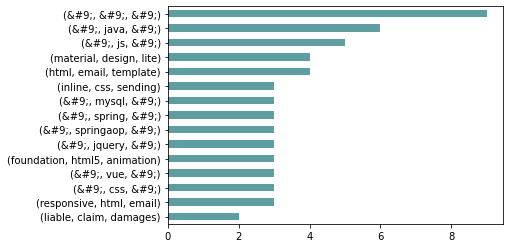

In [158]:
pd.Series(nltk.trigrams(html_top_words.split())).value_counts(ascending = True).tail(15).plot.barh(color = 'cadetblue')

In [ ]:
## Takeaway for HTML trigrams:
 - 

<AxesSubplot:>

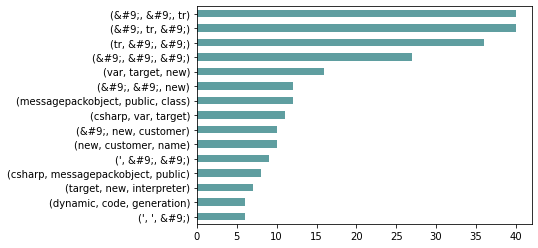

In [159]:
pd.Series(nltk.trigrams(c_sharp_top_words.split())).value_counts(ascending = True).tail(15).plot.barh(color = 'cadetblue')

<AxesSubplot:>

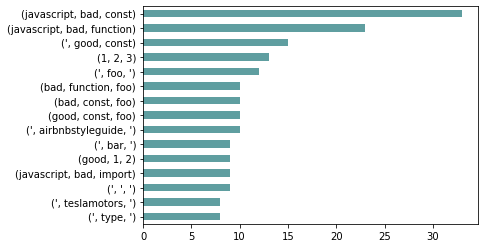

In [160]:
pd.Series(nltk.trigrams(JavaScript_top_words.split())).value_counts(ascending = True).tail(15).plot.barh(color = 'cadetblue')

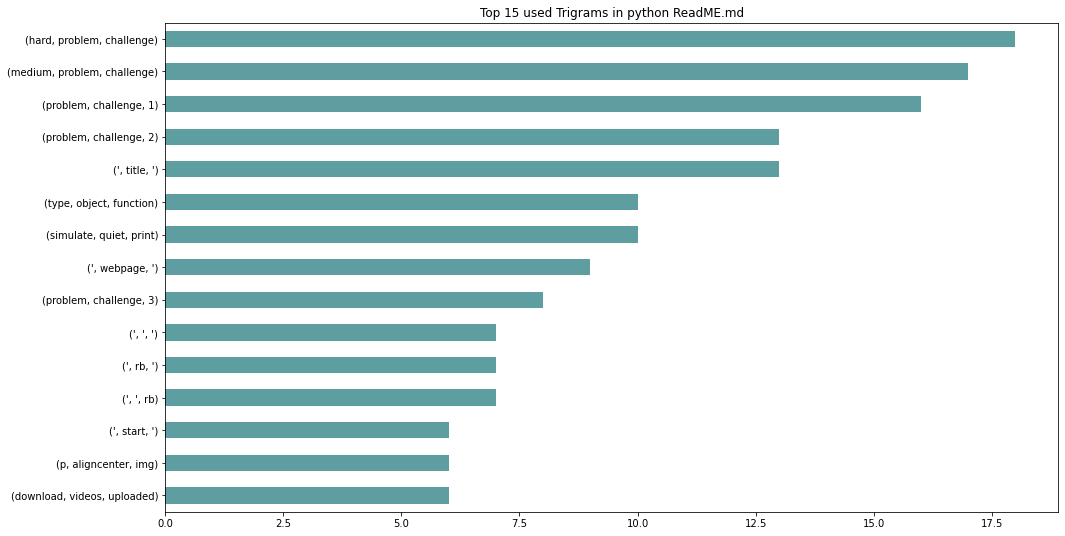

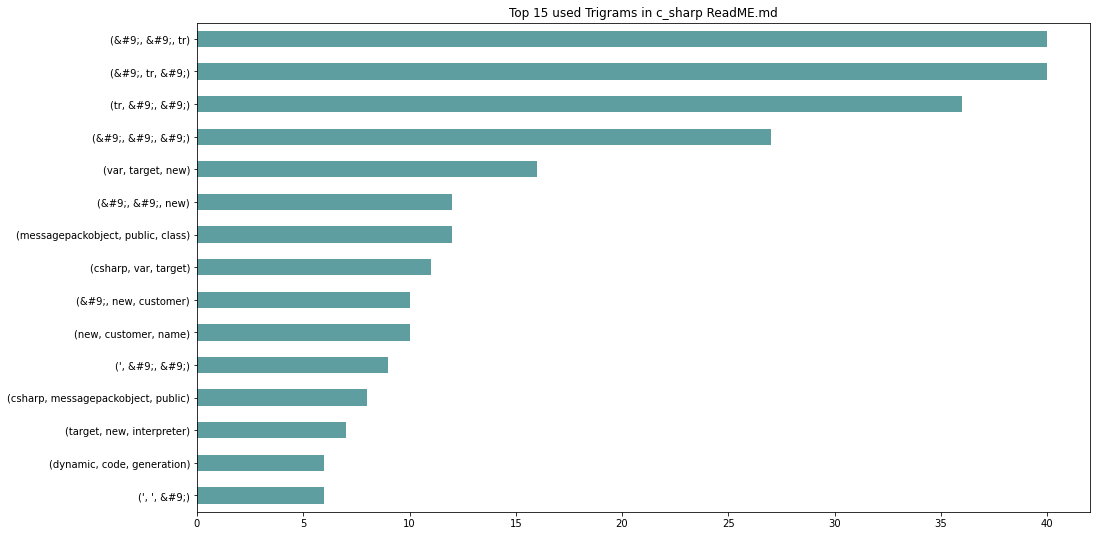

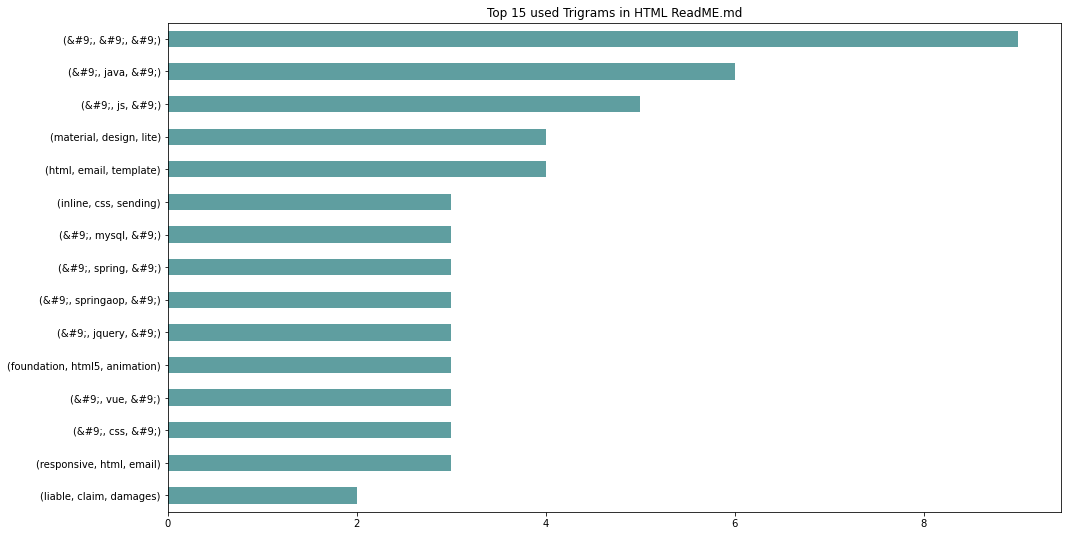

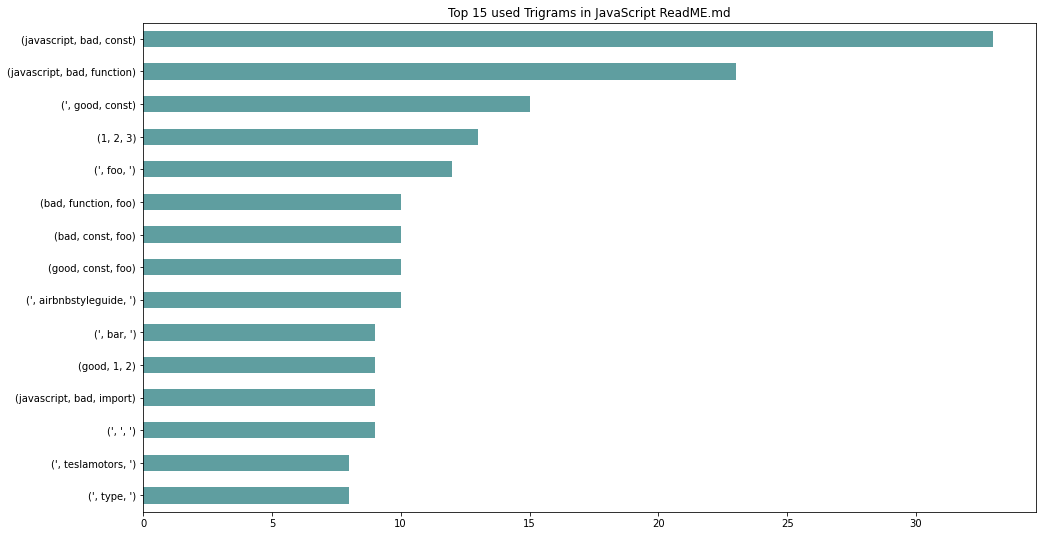

In [161]:
lang_clean_words = {'python':python_top_words,
              'c_sharp':c_sharp_top_words,
              'HTML':html_top_words,
              'JavaScript':JavaScript_top_words}
for key, value in lang_clean_words.items():
    plt.figure(figsize=(16, 9))
    pd.Series(nltk.trigrams(value.split())).value_counts(ascending = True).tail(15).plot.barh(color = 'cadetblue')
    plt.title(f'Top 15 used Trigrams in {key} ReadME.md')
    plt.show()


word clouds

In [248]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    # h = int(360.0 * 200.0 / 255.0)
    h = int(360.0 * 190.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    # l = int(100.0 * float(random_state.randint(80, 200)) / 255.0)
    l = int(100.0 * float(random_state.randint(30, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

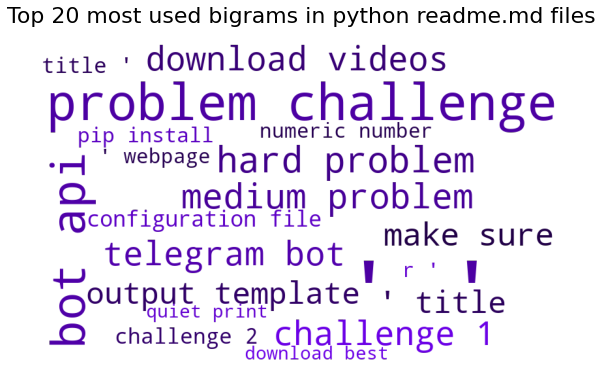

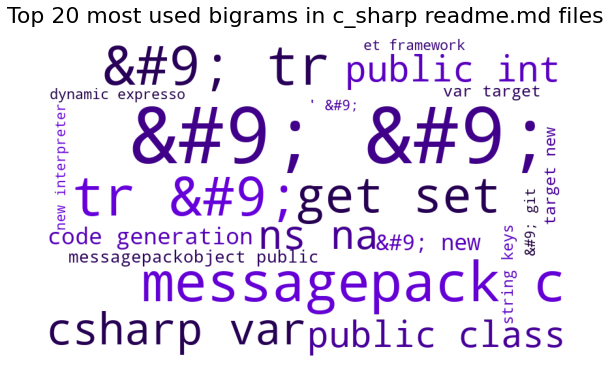

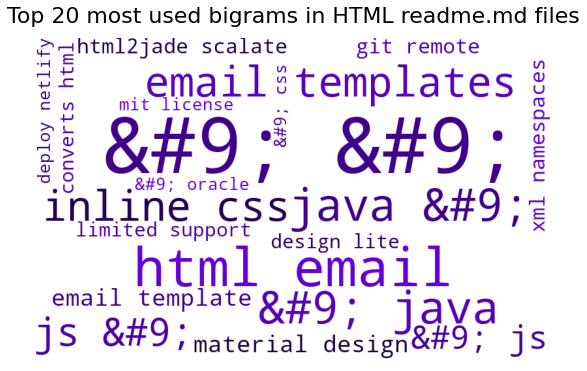

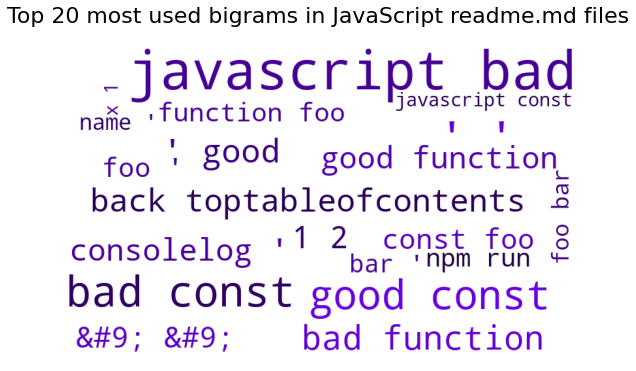

In [250]:
from wordcloud import WordCloud
for key, value in lang_clean_words.items():
    data = {k[0] + ' ' + k[1]: v for k, v in pd.Series(nltk.bigrams(value.split()))\
                                                       .value_counts().head(30)\
                                                       .to_dict().items()}
    img = WordCloud(background_color= None, 
                    width=800, 
                    height=500, 
                    mode = 'RGBA', 
                    color_func = random_color_func,
                    max_words = 20).generate_from_frequencies(data)
    plt.figure(figsize=(10, 6), edgecolor = 'black', facecolor = 'white')
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Top 20 most used bigrams in {key} readme.md files', pad = 15, fontdict ={'fontsize':  22, 'color': 'black'})
    plt.show()